In [1]:
import cv2
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
W = tf.Variable(np.load("W.npy"))
V = tf.Variable(np.load("V.npy"))

b1 = tf.Variable(np.load("b1.npy"))
b2 = tf.Variable(np.load("b2.npy"))

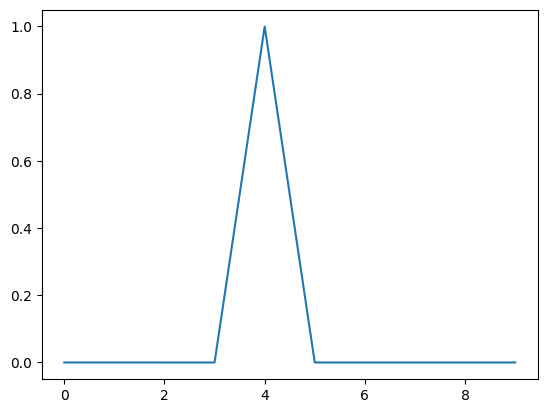

In [3]:
test_sample=[]
file_name = "4.png"
image = cv2.imread("./test sample/" + file_name)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
test_sample.append(binary_image.flatten())
test_sample = tf.Variable(np.array(test_sample, dtype=np.float32))

with tf.GradientTape() as tape:
    tape.watch([W, b1, V, b2])
    h = tf.nn.sigmoid(tf.matmul(test_sample, W) + b1)
    logits = tf.matmul(h, V) + b2
    y = tf.nn.softmax(logits)

plt.figure()
plt.plot(y[0])